In [1]:
#
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [83]:
df=pd.read_csv('spam.csv')


In [94]:
df.tail(40)

,label,message
5532,ham,happened here while you were adventuring
5533,ham,"Hey chief, can you give me a bell when you get..."
5534,ham,Ok which your another number
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5536,ham,Aiyah ok wat as long as got improve can alread...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5538,ham,I can't believe how attached I am to seeing yo...
5539,ham,Just sleeping..and surfing
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5541,ham,Yeah it's jus rite...


In [84]:
# drop unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [38]:
# let's check dataset shape
df.shape

(5572, 2)

In [101]:
# Renaming the column
df.rename({'v1':'label','v2':'message'},axis=1, inplace=True)


In [102]:
#
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [41]:

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [103]:
lemmatize= WordNetLemmatizer()

stop_word= set(stopwords.words('english'))
stop_word.update(('u','n','r','nd', 'un','il','th','da','dont','co','uk', 'p','c'))

In [104]:
# making new column of message length
df['length']= df['message'].str.len()

In [63]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [107]:
# convert all message to lower case
df['message']= df['message'].str.lower()

In [106]:
# let's Make a function for cleaning the text data
def clean_data(message):
    text= re.sub(r"n\'t", ' not', message)
    text= re.sub(r'http\S+', '', text)
    text= re.sub(r'\£+|\$+', ' dollars ', text)
    text=re.sub(r'\d{10,}', ' number ',text)
    text= re.sub(r"'", " ' ", text)
    text= re.sub(r'"', ' " ', text)  
    text= re.sub(r"\'ve", ' have', text)
    text= re.sub(r"\'m", ' am', text)
    text= re.sub(r"\'re", ' are', text)
    text= re.sub("\'s", 's', text)
    
    text= re.sub(r'https?:\/{2}.*?[\s+]', ' ', text ) # remove hyperlink
    text= re.sub('[^A-Za-z]+',' ', text)
    text= re.sub("\s+",' ', text)
    return text


In [108]:
from tqdm import tqdm
preprocess=[]
for var in tqdm(df['message'].values):
    sent= clean_data(var)
#    sent= re.sub('[^A-Za-z]+',' ', sent)
    sent= ' '.join(e for e in sent.split() if e not in stop_word) #
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split()) #
    preprocess.append(sent.strip())


100%|██████████| 5572/5572 [00:00<00:00, 7802.92it/s]


In [109]:
df['message']= preprocess

In [114]:
# 
df['clean_len']= df['message'].str.len()
df.head()

,label,message,length,clean_len
0,ham,go jurong point crazy available bugis great wo...,111,80
1,ham,ok lar joking wif oni,29,21
2,spam,free entry wkly comp win fa cup final tkts st ...,155,106
3,ham,dun say early hor already say,49,29
4,ham,nah think go usf life around though,61,35


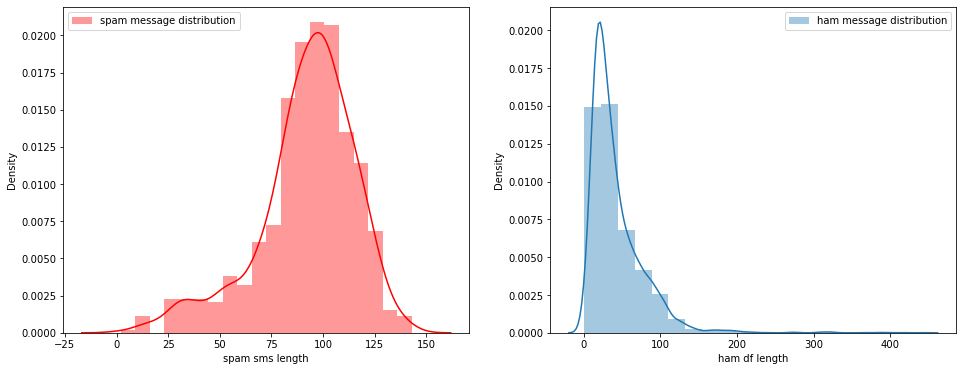

In [115]:
# Message distribution AFTER cleaning

f,ax= plt.subplots(1,2,figsize=(16,6))

sns.distplot(df[df['label']=='spam']['clean_len'], bins=20, ax=ax[0], label='spam message distribution',color='r')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(df[df['label']=='ham']['clean_len'], bins=20, ax=ax[1], label='ham message distribution')
ax[1].set_xlabel('ham df length')
ax[1].legend()
plt.show()

In [263]:
#nltk.download()

In [116]:
# convert into numeric form of 'label' value
df['label'].replace({'ham':0,'spam':1}, inplace=True)

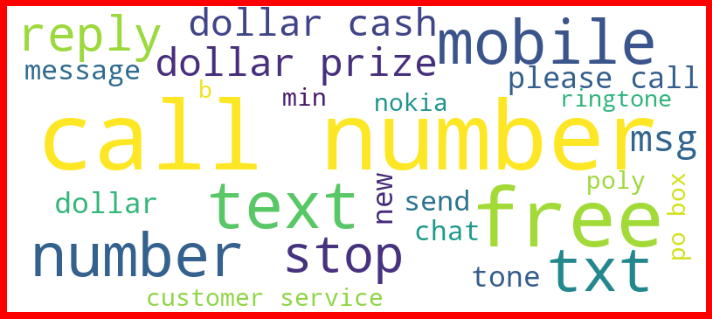

In [118]:
# GETTING SENSE OF CLOUD WORDS OF 'spam'
from wordcloud import WordCloud

spam= df['message'][df['label']==1]
spam_cloud= WordCloud(width=800,height=350, background_color='white', max_words=25).generate(' '.join(spam))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

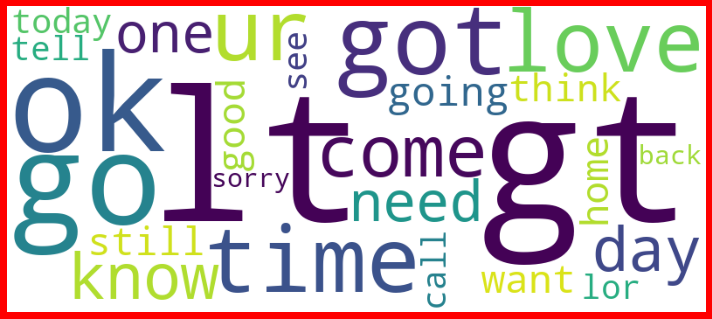

In [119]:

# GETTING SENSE OF CLOUD WORDS OF 'ham'
from wordcloud import WordCloud

spam= df['message'][df['label']==0]
spam_cloud= WordCloud(width=800,height=350, background_color='white', max_words=25).generate(' '.join(spam))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB

In [123]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X = tfidf.fit_transform(df['message'])

In [125]:
y= df['label']
xtrain,xtest, ytrain,ytest= train_test_split(X,y, test_size=0.20, random_state=59, stratify=y)

0.9874439461883409


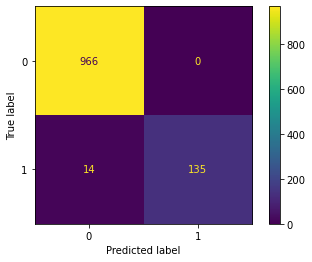

In [126]:
rf= RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=200)
rf.fit(xtrain,ytrain)
pred= rf.predict(xtest)
print(accuracy_score(ytest,pred))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(ytest,pred, labels= rf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()                 
plt.show()                   

0.9775784753363229


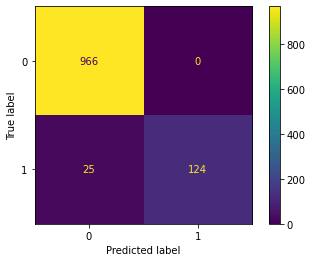

In [127]:
## LET'S TRAIN THE MODEL WITH MULTINOMIAL NAIVE BAYES
naive = MultinomialNB()
naive.fit(xtrain,ytrain)
n_pred= naive.predict(xtest)
print(accuracy_score(ytest,n_pred))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(ytest,n_pred, labels= naive.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive.classes_)
disp.plot()                 
plt.show()  


# 2 

In [157]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [126]:
sms=pd.read_csv('spam.csv')

In [3]:
#
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [127]:
# Dataset has extra columns- Remove
# Removing those columns
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)

In [128]:
# RENAMING COLUMNS
sms.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [129]:
#
print('shape=',sms.shape)
print()
print(sms.head())

shape= (5572, 2)

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [130]:
#
print('ham and spam counts \n',sms.label.value_counts())

ham and spam counts 
 ham     4825
spam     747
Name: label, dtype: int64


In [131]:
# Ratio
print('spam ratio=',round(len(sms[sms['label']=='spam'])/ len(sms.label),2)*100,'%')
print('spam ratio=',round(len(sms[sms['label']=='ham'])/ len(sms.label),2)*100,'%')

spam ratio= 13.0 %
spam ratio= 87.0 %


In [132]:
# New column for Lenght of message

sms['length']= sms['message'].str.len()
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [133]:
# Label coding 0 and 1
sms['label'].replace({'ham':0,'spam':1}, inplace=True)

In [134]:
# convert all message to lower case
sms['message']= sms['message'].str.lower()

In [135]:
sms.head(4)

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49



# clean text using Regular Expression

In [136]:
#
sms['message']= sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddres')


sms['message']= sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$', 'webaddress')

# replace $ sign with dollars
sms['message']= sms['message'].str.replace(r'^\$', 'dollars')

# Replace 10 difit phone number (format include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Removing number with 'number'
sms['message']= sms['message'].str.replace(r'\d+(\.\d+)?', 'number')


In [137]:
## Remove punctuation
sms['message']=sms['message'].str.replace(r'[^\w\d\s]', ' ')

# Remove Leading and trailing whitespace
sms['message']= sms['message'].str.replace(r'^\s+|\s+?$', '')

# Replace whitespace between terms with a singl space
sms['message']=sms['message'].str.replace(r'\s+', ' ')

In [138]:
sms.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in number a wkly comp to win fa cup...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [174]:
sms['message'][459]

'going thru different feeling wavering decisions coping individual time heal everything believe'

In [175]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words= set(stopwords.words('english')+ ['u','r','2','4','im','doin','ure','c','å',])

sms['message']= sms['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words)) 

In [176]:
# New column (clean length) after punctuation, stopwords removal
sms['clean_length']= sms.message.str.len()
sms.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry number wkly comp win fa cup final t...,155,143
3,0,dun say early hor already say,49,29
4,0,nah think goes usf lives around though,61,38


In [177]:
 # Total length removal
print('original length', sms.length.sum())
print('clean length', sms.clean_length.sum()) 

original length 446422
clean length 303654


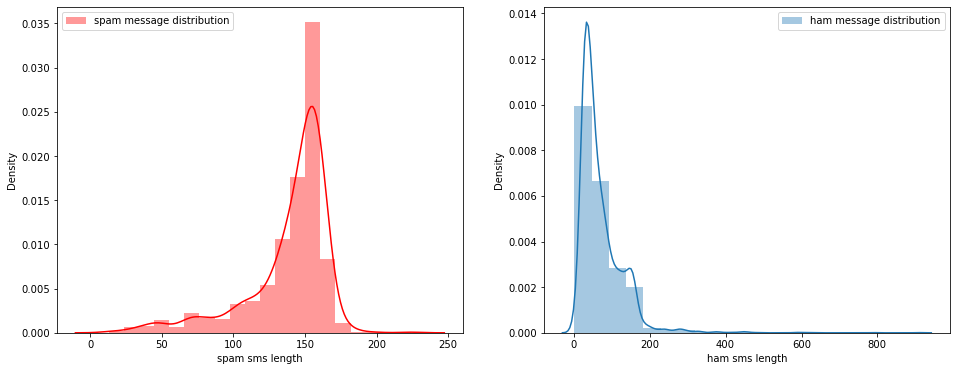

In [195]:
# Message distribution before cleaning

f,ax= plt.subplots(1,2,figsize=(16,6))

sns.distplot(sms[sms['label']==1]['length'], bins=20, ax=ax[0], label='spam message distribution',color='r')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'], bins=20, ax=ax[1], label='ham message distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

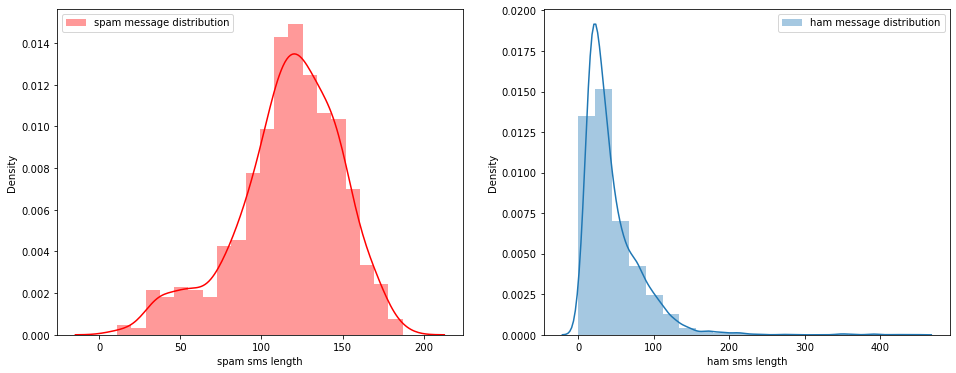

In [196]:
# Message distribution AFTER cleaning

f,ax= plt.subplots(1,2,figsize=(16,6))

sns.distplot(sms[sms['label']==1]['clean_length'], bins=20, ax=ax[0], label='spam message distribution',color='r')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length'], bins=20, ax=ax[1], label='ham message distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

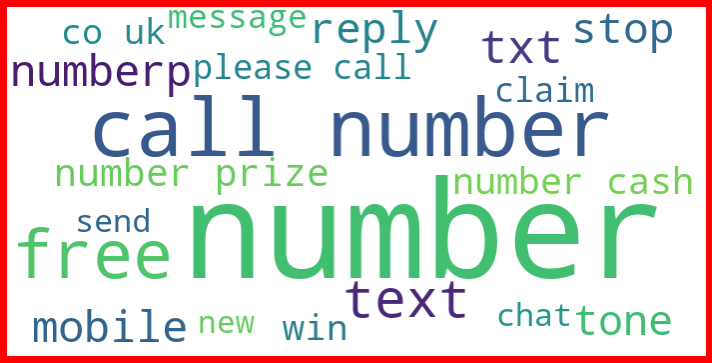

In [205]:
## Getting sense of cloud words of spam

from wordcloud import WordCloud

spam= sms['message'][sms['label']==1]

spam_cloud= WordCloud(width=700,height=350, background_color='white', max_words=20).generate(' '.join(spam))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

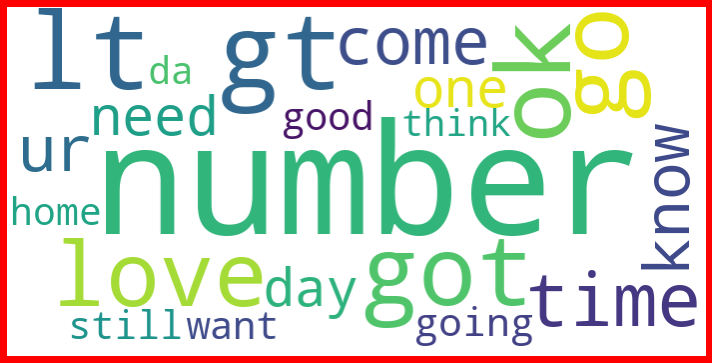

In [206]:
# Getting sense of cloud words of ham
from wordcloud import WordCloud

spam= sms['message'][sms['label']==0]

spam_cloud= WordCloud(width=700,height=350, background_color='white', max_words=20).generate(' '.join(spam))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()


# Traind and Test the Model

In [220]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB Classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [209]:
#
tf_vec= TfidfVectorizer()
features= tf_vec.fit_transform(sms['message'])

x= features
y= sms['label']

In [227]:
#
x_train,x_test, y_train,y_test= train_test_split(x,y ,random_state=19)
y_test.value_counts()

0    1196
1     197
Name: label, dtype: int64

0.9676956209619526


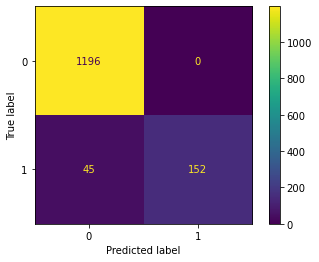

In [219]:
naive= MultinomialNB()
naive.fit(x_train,y_train)
pred= naive.predict(x_test)
print(accuracy_score(y_test, pred))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,pred, labels= naive.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive.classes_)
disp.plot()                 
plt.show()                   

0.9798994974874372


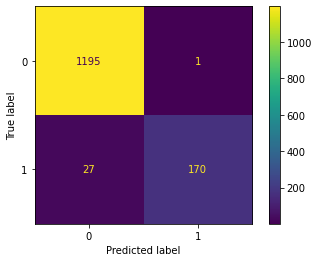

In [229]:
RF= RandomForestClassifier(n_estimators=200,)
RF.fit(x_train,y_train)
pred= RF.predict(x_test)
print(accuracy_score(y_test, pred))

# PLOT CONFUSION MATRIX
cm= confusion_matrix(y_test,pred, labels= RF.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()                 
plt.show()                   